# IMDB Subwords 8K With a Single Layer LSTM

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# We will get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
# We will use the built in tokenizing ability of the tensorflow dataset
tokenizer = info.features['text'].encoder
tokenizer.subwords


['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_',
 't_',
 'with_',
 'for_',
 '.<',
 'on_',
 'but_',
 'movie_',
 ' (',
 'are_',
 'his_',
 'have_',
 'film_',
 'not_',
 'ing_',
 'be_',
 'ed_',
 'you_',
 ' "',
 'it',
 'd_',
 'an_',
 'he_',
 'by_',
 'at_',
 'one_',
 'who_',
 'y_',
 'from_',
 'e_',
 'or_',
 'all_',
 'like_',
 'they_',
 '" ',
 'so_',
 'just_',
 'has_',
 ') ',
 'her_',
 'about_',
 'out_',
 'This_',
 'some_',
 'ly_',
 'movie',
 'film',
 'very_',
 'more_',
 'It_',
 'would_',
 'what_',
 'when_',
 'which_',
 'good_',
 'if_',
 'up_',
 'only_',
 'even_',
 'their_',
 'had_',
 'really_',
 'my_',
 'can_',
 'no_',
 'were_',
 'see_',
 'she_',
 '? ',
 'than_',
 '! ',
 'there_',
 'get_',
 'been_',
 'into_',
 ' - ',
 'will_',
 'much_',
 'story_',
 'because_',
 'ing',
 'time_',
 'n_',
 'we_',
 'ed',
 'me_',
 ': ',
 'most_',
 'other_',
 'don',
 'do_',
 'm_',
 'es_',
 'how_',
 'also

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [6]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 93s 215ms/step - loss: 0.5112 - accuracy: 0.7518 - val_loss: 0.4376 - val_accuracy: 0.8131
Epoch 2/10
391/391 [==============================] - 83s 212ms/step - loss: 0.3500 - accuracy: 0.8594 - val_loss: 0.4122 - val_accuracy: 0.8278
Epoch 3/10
391/391 [==============================] - 85s 218ms/step - loss: 0.3110 - accuracy: 0.8735 - val_loss: 0.5277 - val_accuracy: 0.7605
Epoch 4/10
391/391 [==============================] - 89s 228ms/step - loss: 0.3254 - accuracy: 0.8647 - val_loss: 0.3951 - val_accuracy: 0.8498
Epoch 5/10
391/391 [==============================] - 88s 225ms/step - loss: 0.2013 - accuracy: 0.9262 - val_loss: 0.4436 - val_accuracy: 0.8106
Epoch 6/10
391/391 [==============================] - 88s 226ms/step - loss: 0.1577 - accuracy: 0.9442 - val_loss: 0.4813 - val_accuracy: 0.8303
Epoch 7/10
391/391 [==============================] - 87s 223ms/step - loss: 0.1417 - accuracy: 0.9491 - val_loss: 0.5338 - val_ac

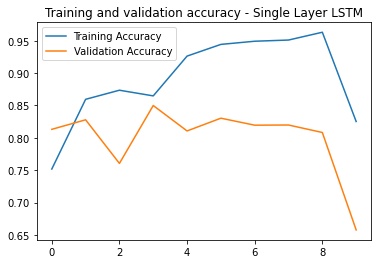

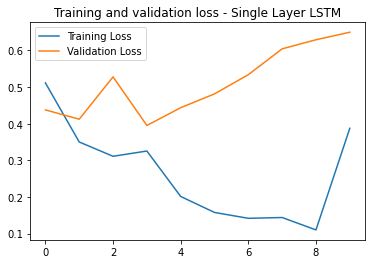

In [8]:
# Evaluate the training accuracy and losses

import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, label='Training Accuracy' )
plt.plot  ( epochs, val_acc, label='Validation Accuracy' )
plt.title ('Training and validation accuracy - Single Layer LSTM')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and validation loss - Single Layer LSTM')
plt.legend()
plt.show()

In [11]:
# define another model with multiple layers LSTM
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
history_2 = model_2.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 183s 457ms/step - loss: 0.5610 - accuracy: 0.7049 - val_loss: 0.6183 - val_accuracy: 0.6689
Epoch 2/10
391/391 [==============================] - 180s 462ms/step - loss: 0.5354 - accuracy: 0.7277 - val_loss: 0.4635 - val_accuracy: 0.8061
Epoch 3/10
391/391 [==============================] - 181s 462ms/step - loss: 0.3659 - accuracy: 0.8460 - val_loss: 0.3709 - val_accuracy: 0.8406
Epoch 4/10
391/391 [==============================] - 178s 455ms/step - loss: 0.2685 - accuracy: 0.8927 - val_loss: 0.3555 - val_accuracy: 0.8436
Epoch 5/10
391/391 [==============================] - 172s 439ms/step - loss: 0.2160 - accuracy: 0.9179 - val_loss: 0.3468 - val_accuracy: 0.8598
Epoch 6/10
391/391 [==============================] - 181s 464ms/step - loss: 0.1756 - accuracy: 0.9360 - val_loss: 0.3410 - val_accuracy: 0.8689
Epoch 7/10
391/391 [==============================] - 178s 455ms/step - loss: 0.1395 - accuracy: 0.9534 - val_loss: 0.3994 -

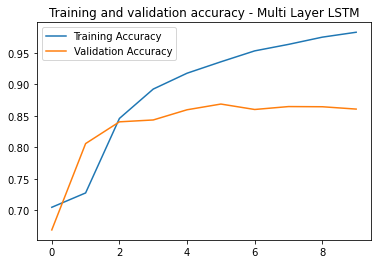

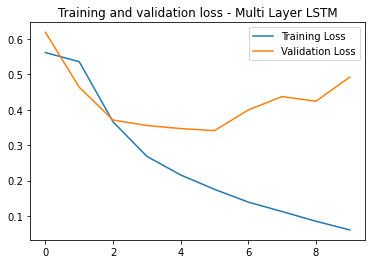

In [13]:
# Evaluate the training accuracy and losses

import matplotlib.pyplot as plt

acc      = history_2.history['accuracy']
val_acc  = history_2.history['val_accuracy']
loss     = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, label='Training Accuracy' )
plt.plot  ( epochs, val_acc, label='Validation Accuracy' )
plt.title ('Training and validation accuracy - Multi Layer LSTM')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and validation loss - Multi Layer LSTM')
plt.legend()
plt.show()

In [15]:
# define another model with convolutions
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation=tf.nn.relu),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train the model
history_3 = model_3.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 28s 59ms/step - loss: 0.4583 - accuracy: 0.7652 - val_loss: 0.3180 - val_accuracy: 0.8734
Epoch 2/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2226 - accuracy: 0.9161 - val_loss: 0.3036 - val_accuracy: 0.8776
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 0.1681 - accuracy: 0.9387 - val_loss: 0.3356 - val_accuracy: 0.8715
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 0.1352 - accuracy: 0.9516 - val_loss: 0.3796 - val_accuracy: 0.8682
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 0.1094 - accuracy: 0.9622 - val_loss: 0.4155 - val_accuracy: 0.8662
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 0.0872 - accuracy: 0.9715 - val_loss: 0.5161 - val_accuracy: 0.8592
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.5670 - val_accuracy: 0.858

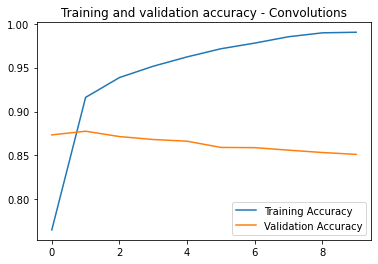

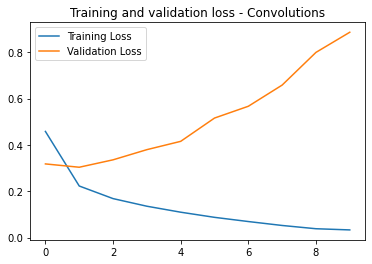

In [18]:
# Evaluate the training accuracy and losses

import matplotlib.pyplot as plt

acc      = history_3.history['accuracy']
val_acc  = history_3.history['val_accuracy']
loss     = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, label='Training Accuracy' )
plt.plot  ( epochs, val_acc, label='Validation Accuracy' )
plt.title ('Training and validation accuracy - Convolutions')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and validation loss - Convolutions')
plt.legend()
plt.show()